## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"], axis = 1)

In [3]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
print(unique_counts)


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
values = application_df['APPLICATION_TYPE'].value_counts()
print(values)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 100
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_values = application_df['CLASSIFICATION'].value_counts()
print(CLASSIFICATION_values)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C1283        1
C4200        1
C8210        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Choose a cutoff value (for example, let's assume the cutoff is 100)
cutoff_value = 1

# Calculate the value counts for each unique application type
value_counts = application_df['CLASSIFICATION'].value_counts()

value_counts_above_cutoff = value_counts[value_counts > cutoff_value]

# Display the filtered value counts
print(value_counts_above_cutoff)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C4100        6
C2400        6
C1600        5
C1257        5
C2710        3
C0           3
C1260        3
C1267        2
C1256        2
C3200        2
C1246        2
C1234        2
Name: CLASSIFICATION, dtype: int64


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 100
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [24]:
# Notes: I can do the following options to adjust the model:
# Creating more bins for rare occurrences in columns.
# Increasing or decreasing the number of values for each bin. 
# Add more neurons to a hidden layer.
# Add more hidden layers.
# Use different activation functions for the hidden layers.
# Add or reduce the number of epochs to the training regimen.

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
nn.add(tf.keras.layers.BatchNormalization())

# Second hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
nn.add(tf.keras.layers.BatchNormalization())

# Third hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
nn.add(tf.keras.layers.BatchNormalization())

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Check the structure of the model
nn.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 60)                3060      
_________________________________________________________________
batch_normalization_9 (Batch (None, 60)                240       
_________________________________________________________________
dense_14 (Dense)             (None, 15)                915       
_________________________________________________________________
batch_normalization_10 (Batc (None, 15)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 80        
_________________________________________________________________
batch_normalization_11 (Batc (None, 5)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=30)

Train on 25724 samples
Epoch 1/30
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6547 - acc: 0.7073
Epoch 2/30
25724/25724 [==============================] - 1s 25us/sample - loss: 0.6134 - acc: 0.7267
Epoch 3/30
25724/25724 [==============================] - 1s 24us/sample - loss: 0.6004 - acc: 0.7262
Epoch 4/30
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5913 - acc: 0.7265
Epoch 5/30
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5853 - acc: 0.7280
Epoch 6/30
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5807 - acc: 0.7273
Epoch 7/30
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5774 - acc: 0.7283
Epoch 8/30
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5748 - acc: 0.7285
Epoch 9/30
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5716 - acc: 0.7301
Epoch 10/30
25724/25724 [==============================] - 

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5605 - acc: 0.7248
Loss: 0.5605014348099601, Accuracy: 0.724781334400177


In [29]:
import h5py
import tensorflow as tf

# Export our model to HDF5 file
model_filename = "AlphabetSoupCharityOptimization3.h5"
nn.save(model_filename)



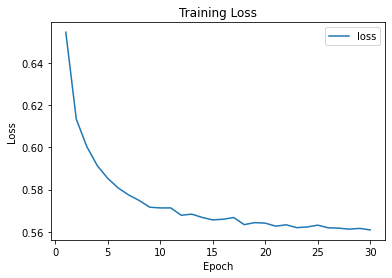

In [34]:
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


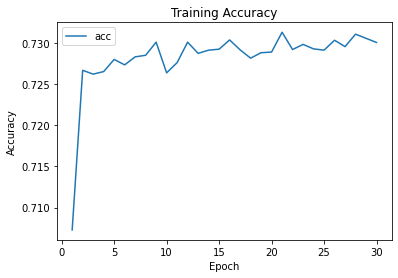

In [35]:
# Plot the accuracy
history_df.plot(y="acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()